In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
births = pd.read_csv("../Data/us_births_2016_2021.csv")

education_level = ['8th grade or less', '9th through 12th grade with no diploma', 'High school graduate or GED completed',
                   'Some college credit, but not a degree', 'Associate degree (AA, AS)', "Bachelor's degree (BA, AB, BS)", 
                   "Master's degree (MA, MS, MEng, MEd, MSW, MBA)", 
                   "Doctorate (PhD, EdD) or Professional Degree (MD, DDS, DVM, LLB, JD)",
                   "Unknown or Not Stated"]

# Convert indicator names to capitalized form
capitalized_education_level = [name.capitalize() for name in education_level]

filtered_df = births[births['Education Level of Mother'].isin(capitalized_education_level)]

# List of Education to be graphed
states = ["California", "Texas", "Illinois", "Louisana", "North Carolina", "Connecticut"]

C:\Users\chris\AppData\Local\Temp\ipykernel_19816\1589706565.py:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = state_data.groupby(['Year', 'Education Level of Mother']).sum()


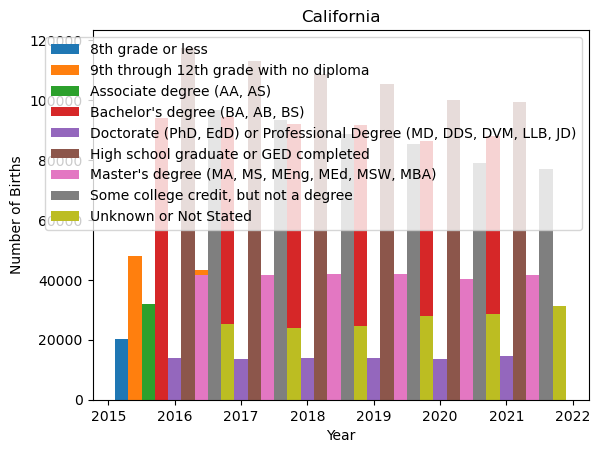

<Figure size 640x480 with 0 Axes>

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data from the CSV file
data = pd.read_csv("../Data/us_births_2016_2021.csv")

# Define the states for which you want to create the graphs
states = ["California"]

fig_width = 60
fig_height = 6
legend_fontsize = 6

# Iterate over each state and create a bar graph
for state in states:
    # Filter the data for the current state
    state_data = data[data['State'] == state]

    # Group the data by year and education level of the mother
    grouped_data = state_data.groupby(['Year', 'Education Level of Mother']).sum()

    # Reset the index to access the grouped columns
    grouped_data = grouped_data.reset_index()

    # Create the bar graph
    fig, ax = plt.subplots()
    years = np.arange(2016, 2022)
    education_levels = grouped_data['Education Level of Mother'].unique()

    # Calculate the width for each bar
    bar_width = 0.2
    num_bars = len(education_levels)
    offset = -(num_bars - 1) / 2 * bar_width

    # Plot bars for each education level
    for i, education_level in enumerate(education_levels):
        values = grouped_data[grouped_data['Education Level of Mother'] == education_level]['Number of Births']
        x = years + offset + i * bar_width
        ax.bar(x, values, width=bar_width, label=education_level)

    ax.set_xlabel('Year')
    ax.set_ylabel('Number of Births')
    ax.set_title(state)
    ax.legend()

    # # Show or save the graph
    plt.show()  # Uncomment this line to display the graph
    plt.savefig(f'{state}_births_graph.png')  # Save the graph as an image
    plt.close(fig)  # Close the figure to free up memory


In [ ]:
# Loop through each indicator and create a separate graph
for education in education_level:
    plt.figure(figsize=(10, 6))  # Set the figure size to (10, 6) inches for a larger graph

    # Filter data for the specific indicator
    education_data = filtered_df[filtered_df['Education Level of Mother'] == education]

    for state in states:
        # Filter data for the specific country
        state_data = education_data[education_data['State'] == state]

        years = education_data.columns[2:]  # Assuming the year columns start from the 5th column

        # Extract the values for the specific country and indicator
        values = education_data.iloc[0, 2:].values
        values = [v if pd.notnull(v) else np.nan for v in values]  # Replace empty cells with NaN

        # Plot the values
        plt.plot(years, values, label=education)

In [ ]:
def births_rows(births):
    row_count = births.shape[0]
    """
    returns a single number
    """
    return row_count
row_count = births_rows(births)
print(row_count)

In [ ]:
exclude_columns = []
value_maps = {}

#Iteration
for column in births.columns:
    if column not in exclude_columns:
        if np.issubdtype(births[column].dtype, np.number):
            continue

        #Unique
        unique_values = births[column].unique()

        value_map = {value: index + 1 for index, value in enumerate(unique_values)}

        value_maps[column] = value_map

for column, value_map in value_maps.items():
    print(f"Value map for column '{column}':")
    print(value_map)
    print()